
----- Training Models for All Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



XGB Boosting Ensemble (All Features) Metrics:
Accuracy: 0.996085023380835
Precision: 0.9960663273168274
Recall: 0.996085023380835
F1 Score: 0.9955318048861918


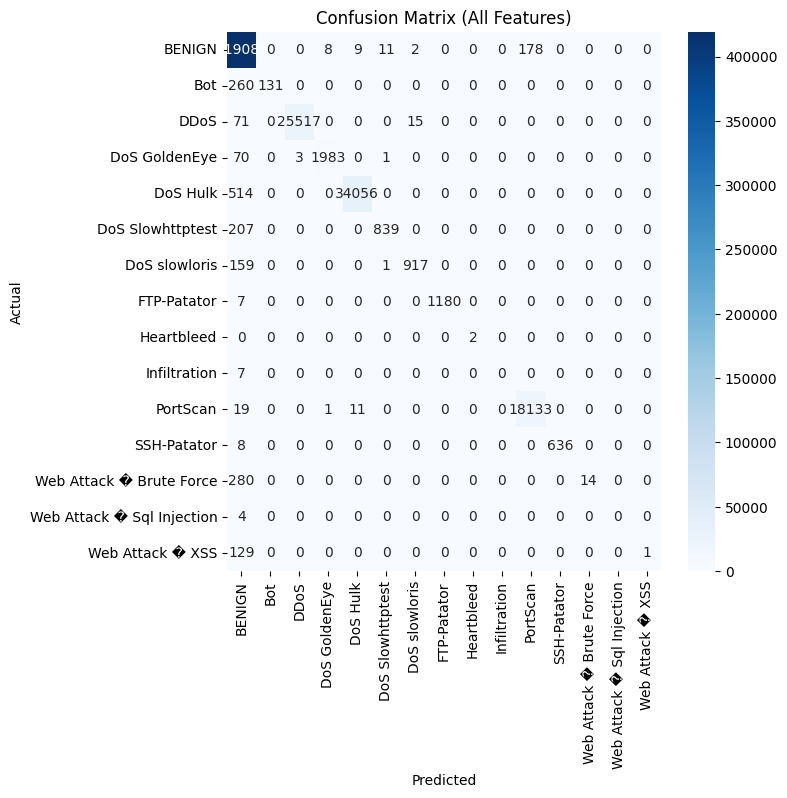


----- Training Models for IG Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



XGB Boosting Ensemble (IG Top 5 Features) Metrics:
Accuracy: 0.9871311249561423
Precision: 0.986839321453314
Recall: 0.9871311249561423
F1 Score: 0.9858009698279271


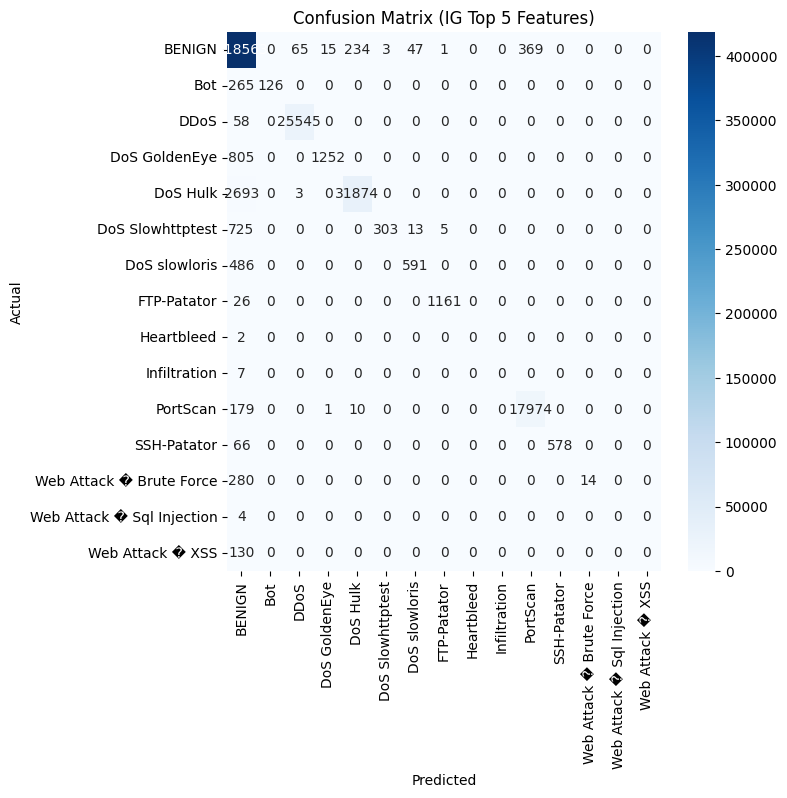


----- Training Models for IG Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



XGB Boosting Ensemble (IG Top 10 Features) Metrics:
Accuracy: 0.9878348296142707
Precision: 0.9878346804202528
Recall: 0.9878348296142707
F1 Score: 0.986664213232823


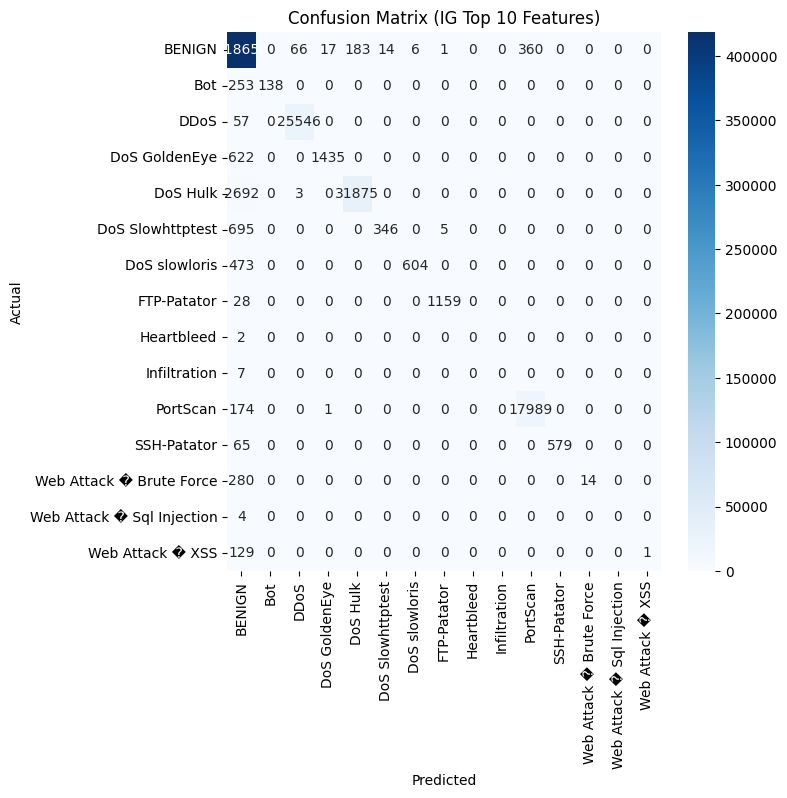


----- Training Models for KBest Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



XGB Boosting Ensemble (KBest Top 5 Features) Metrics:
Accuracy: 0.9500627387392387
Precision: 0.9440174540205463
Recall: 0.9500627387392387
F1 Score: 0.9448161743585395


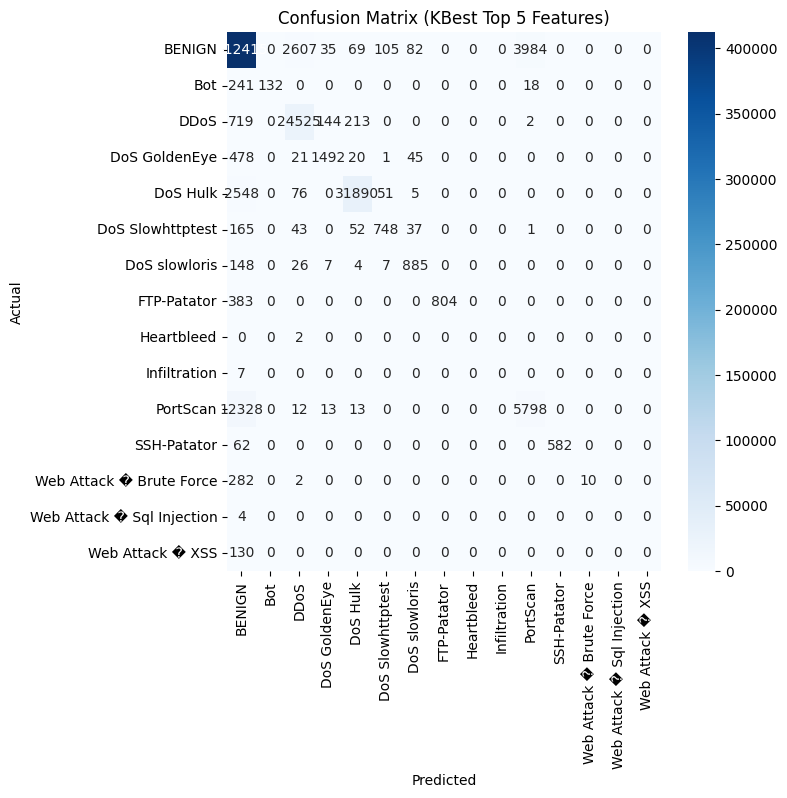


----- Training Models for KBest Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



XGB Boosting Ensemble (KBest Top 10 Features) Metrics:
Accuracy: 0.9924891916911311
Precision: 0.9916177961715881
Recall: 0.9924891916911311
F1 Score: 0.9919064339778514


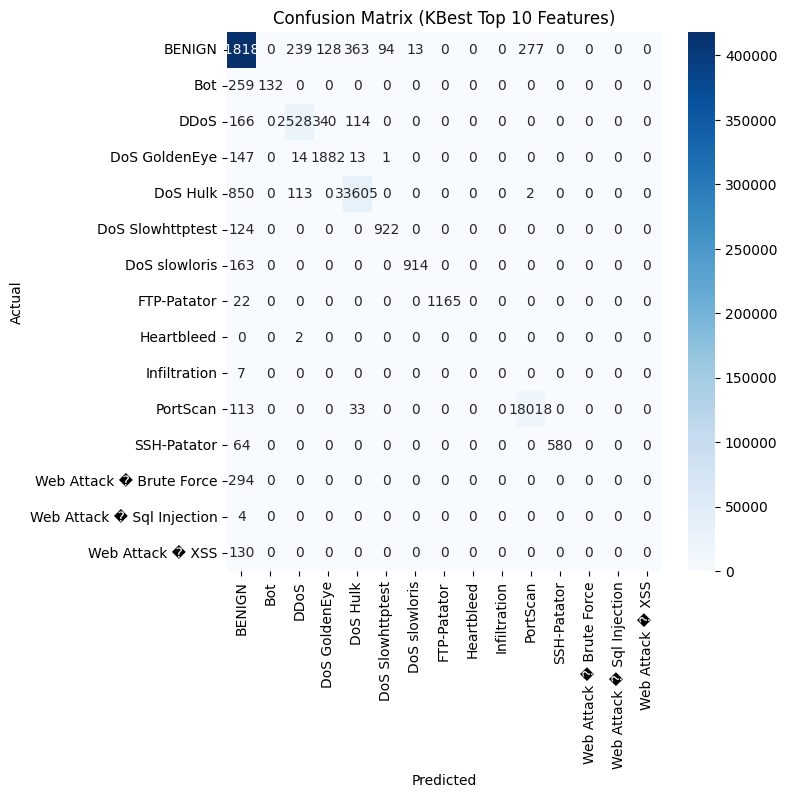

In [1]:
import time
import xgboost as xgb
import sys
sys.path.append('/home/ibibers/IDS Project/IDS-Machine-Learning-Techniques-')
from CICIDS2017 import data_preprocessing, evaluate_model, plot_confusion_matrix


# ---------------------------- Model Training and Evaluation ----------------------------
results = []
datasets, le = data_preprocessing()
for name, (X_tr, X_te, y_train , y_test) in datasets.items():
    print(f"\n----- Training Models for {name} -----")

    start_time = time.time()

    xgb_model = xgb.XGBClassifier(random_state=42, learning_rate=0.01, objective='multi:softmax')

    xgb_model.fit(X_tr, y_train)
    train_end_time = time.time()

    y_pred_encoded = xgb_model.predict(X_te)
    pred_end_time = time.time()

    metrics = evaluate_model(y_test, y_pred_encoded, f"XGB Boosting Ensemble ({name})")
    metrics['Training Time (s)'] = train_end_time - start_time
    metrics['Prediction Time (s)'] = pred_end_time - train_end_time
    metrics['Total Time (s)'] = pred_end_time - start_time
    results.append(metrics)

    plot_confusion_matrix(y_test, y_pred_encoded, le.classes_, f"Confusion Matrix ({name})")


In [2]:

# ---------------------------- Summary and Save Results ----------------------------
import pandas as pd
summary = pd.DataFrame(results)
print("\nSummary of Results:")
print(summary)

summary.to_csv("XGB_ensemble_classifier_evaluation_summary.csv", index=False)



Summary of Results:
                                           Model  Accuracy  Precision  \
0           XGB Boosting Ensemble (All Features)  0.996085   0.996066   
1      XGB Boosting Ensemble (IG Top 5 Features)  0.987131   0.986839   
2     XGB Boosting Ensemble (IG Top 10 Features)  0.987835   0.987835   
3   XGB Boosting Ensemble (KBest Top 5 Features)  0.950063   0.944017   
4  XGB Boosting Ensemble (KBest Top 10 Features)  0.992489   0.991618   

     Recall  F1 Score  Training Time (s)  Prediction Time (s)  Total Time (s)  
0  0.996085  0.995532        1303.624145             1.715307     1305.339452  
1  0.987131  0.985801        1130.702558             1.094986     1131.797544  
2  0.987835  0.986664        1125.953180             0.840904     1126.794084  
3  0.950063  0.944816         578.482589             0.675025      579.157614  
4  0.992489  0.991906         468.790686             0.639204      469.429889  
